In [1]:
from google.cloud import bigquery # modulo para interactuar con la API y el service account del DW
import pandas as pd
import numpy as np
from plotnine import *
%matplotlib inline
# un bonita funcion para hacer los querys 
def query_BQ(query_string):
    client = bigquery.Client() # inicializamos el cliente, pero antes se debe de fijar la variable de entorno 
    query_job = client.query(query_string)
    results = query_job.result().to_dataframe()  # Waits for job to complete and cast to pandas dataframe
    return(results)

In [2]:
from sklearn.preprocessing import scale
from h2o.automl import H2OAutoML
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators import H2OXGBoostEstimator
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2ONaiveBayesEstimator
from sklearn.metrics import confusion_matrix
from google.cloud import bigquery # modulo para interactuar con la API y el service account del DW
import pandas as pd
import numpy as np
import h2o
import datetime
inicio = datetime.datetime.now()

In [3]:
query = '''
SELECT distinct user_id,
max(baby_age) as baby_age,
max(days_to_convert) as days_to_convert, /*Use only for analysis*/
#max(days_to_take_FT) as days_to_take_FT,
max(days_in_app) as days_in_app,
max(device) as device,#
max(adjust_network) as adjust_network,
max(android_app_version) as android_app_version,
max(android_lib_version) as android_lib_version /*.002 null class*/,
max(screen_width) as screenwidth,
max(timezone) as timezone,
max(user_relationship) as user_relationship,
max(user_role) as user_role,
#max(initial_assessment_completed) as initial_assessment_completed,
#max(FT_start) as FT_start,
#max(FT_conversion) as FT_conversion,
#mp_country,
y,
sum(case when video = "Completed" then 1 else 0 end) as Video_Completed,
sum(case when name ="OpenApp" then 1 else 0 end) as OpenApp,
sum(case when name ="LogOut" then 1 else 0 end) as LogOut,
sum(case when name ="S_DAPNewSkills" then 1 else 0 end) as S_DAPNewSkills,
sum(case when name ="AB_TEST" then 1 else 0 end) as AB_TEST,
sum(case when name ="S_SPHome" then 1 else 0 end) as S_SPHome,
sum(case when name ="S_SPLogin" then 1 else 0 end) as S_SPLogin,
sum(case when name ="LogIn" then 1 else 0 end) as LogIn,
sum(case when name ="SPForgotPass" then 1 else 0 end) as SPForgotPass,
sum(case when name ="S_SPSignup" then 1 else 0 end) as S_SPSignup,
sum(case when name ="SignUp" then 1 else 0 end) as SignUp,
sum(case when name ="OBCreateUser" then 1 else 0 end) as OBCreateUser,
sum(case when name ="S_OBBabyName" then 1 else 0 end) as S_OBBabyName,
sum(case when name ="OBCreateTwins" then 1 else 0 end) as OBCreateTwins,
sum(case when name ="S_OBPremature" then 1 else 0 end) as S_OBPremature,
sum(case when name ="Paywall_Dismiss" then 1 else 0 end) as Paywall_Dismiss,
sum(case when name ="S_Paywall_Soft" then 1 else 0 end) as S_Paywall_Soft,
sum(case when name ="S_IAIntro" then 1 else 0 end) as S_IAIntro,
sum(case when name ="IAStraightToActivities" then 1 else 0 end) as IAStraightToActivities,
sum(case when name ="IAStartAssessment" then 1 else 0 end) as IAStartAssessment,
sum(case when name ="IASkipAssessment" then 1 else 0 end) as IASkipAssessment,
sum(case when name ="MasterSkill" then 1 else 0 end) as MasterSkill,
sum(case when name ="IAFinishSkill" then 1 else 0 end) as IAFinishSkill,
sum(case when name ="S_HealthInterest" then 1 else 0 end) as S_HealthInterest,
sum(case when name ="S_IASetReminder" then 1 else 0 end) as S_IASetReminder,
sum(case when name ="IAReminder" then 1 else 0 end) as IAReminder,
sum(case when name ="S_IA_Answer_Skill" then 1 else 0 end) as S_IA_Answer_Skill,
sum(case when name ="DAPChangeActivity" then 1 else 0 end) as DAPChangeActivity,
sum(case when name ="S_DAPPastPlansPremium" then 1 else 0 end) as S_DAPPastPlansPremium,
sum(case when name ="DAPActivityCompleted" then 1 else 0 end) as DAPActivityCompleted,
sum(case when name ="S_DAPMaterials" then 1 else 0 end) as S_DAPMaterials,
sum(case when name ="MilestonesUpdate" then 1 else 0 end) as MilestonesUpdate,
sum(case when name ="ArticleView" then 1 else 0 end) as ArticleView,
sum(case when name ="SlideshowView" then 1 else 0 end) as SlideshowView,
sum(case when name ="ActivityView" then 1 else 0 end) as ActivityView,
sum(case when name ="ClickInDAP" then 1 else 0 end) as ClickInDAP,
sum(case when name ="RateActivityDAP" then 1 else 0 end) as RateActivityDAP,
sum(case when name ="Feedback_RateActivity" then 1 else 0 end) as Feedback_RateActivity,
sum(case when name ="Dismiss_Feedback_RateActivity" then 1 else 0 end) as Dismiss_Feedback_RateActivity,
sum(case when name ="LifeSpent" then 1 else 0 end) as LifeSpent,
sum(case when name ="WhatchAd" then 1 else 0 end) as WhatchAd,
sum(case when name ="VideoPlayerActivity" then 1 else 0 end) as VideoPlayerActivity,
sum(case when name ="NPSSubmit" then 1 else 0 end) as NPSSubmit,
sum(case when name ="S_NPSScore" then 1 else 0 end) as S_NPSScore,
sum(case when name ="S_ProgressHome" then 1 else 0 end) as S_ProgressHome,
sum(case when name ="S_MenuFamilyHome" then 1 else 0 end) as S_MenuFamilyHome,
sum(case when name ="MenuHelp" then 1 else 0 end) as MenuHelp,
sum(case when name ="MenuMemberStats" then 1 else 0 end) as MenuMemberStats,
sum(case when name ="MenuFamilyInvite" then 1 else 0 end) as MenuFamilyInvite,
sum(case when name ="MenuChangeBirthday" then 1 else 0 end) as MenuChangeBirthday,
sum(case when name ="S_MenuEditBaby" then 1 else 0 end) as S_MenuEditBaby,
sum(case when name ="S_MenuUserProfile" then 1 else 0 end) as S_MenuUserProfile,
sum(case when name ="MenuFamilyDefault" then 1 else 0 end) as MenuFamilyDefault,
sum(case when name ="S_MenuFamilyProfile" then 1 else 0 end) as S_MenuFamilyProfile,
sum(case when name ="TAPCallToAction" then 1 else 0 end) as TAPCallToAction,
sum(case when name ="S_PremiumProcess" then 1 else 0 end) as S_PremiumProcess,
sum(case when name ="RestorePurchase" then 1 else 0 end) as RestorePurchase,
sum(case when name ="S_CATHome_P" then 1 else 0 end) as S_CATHome_P,
sum(case when name ="S_CATHome_F" then 1 else 0 end) as S_CATHome_F,
sum(case when name ="CATSearch" then 1 else 0 end) as CATSearch,
sum(case when name ="S_CATViewSkill" then 1 else 0 end) as S_CATViewSkill,
sum(case when name ="S_CollectionView" then 1 else 0 end) as S_CollectionView,
sum(case when name ="ViewAllCollections" then 1 else 0 end) as ViewAllCollections,
sum(case when name ="S_SearchEmptyState" then 1 else 0 end) as S_SearchEmptyState,
sum(case when name ="ResetSearch" then 1 else 0 end) as ResetSearch,
sum(case when name ="S_MilestonesHome" then 1 else 0 end) as S_MilestonesHome,
sum(case when name ="SkillsViewAllSkills" then 1 else 0 end) as SkillsViewAllSkills,
sum(case when name ="S_PromoCode" then 1 else 0 end) as S_PromoCode,
sum(case when name ="PromoCodeRedeem" then 1 else 0 end) as PromoCodeRedeem,
sum(case when name ="S_FeedHome" then 1 else 0 end) as S_FeedHome,
sum(case when name ="InviteClassrooms" then 1 else 0 end) as InviteClassrooms,
sum(case when name ="shown" then 1 else 0 end) as shown,
sum(case when name ="clicked" then 1 else 0 end) as clicked,
sum(case when name ="dismissed" then 1 else 0 end) as dismissed
from
(
SELECT u.id as user_id,
date_diff(current_date('UTC'),date(b.birthday), month) as baby_age,
#timestamp_diff(timestamp(current_date('UTC')),b.birthday, day) as baby_ageD,
timestamp_diff(ued.trial_start ,u.created_at, day) as days_to_take_FT,/*Use only for analysis*/
timestamp_diff(timestamp(current_date('UTC')) ,u.created_at, day) as days_in_app,/*Use only for analysis*/

timestamp_diff(ued.premium_conversion_date,u.created_at, day) as days_to_convert,/*Use only for analysis*/
ev.name, ev.screen_height,ev.screen_width,ev.properties,
u.mp_country,
u.adjust_network,
IF(ev.name= "VideoPlayerActivity" and JSON_EXTRACT(ev.properties, "$.video_completed")="true", "Completed", "Not Completed") as Video,
if (ev.device is null, 'NULL', ev.device) as device,
/*0.01915nulls */
if (p.android_app_version is null, 'NULL', android_app_version) as android_app_version, /*all related to android will be categoric 0.001 nulls*/
if( p.android_app_version_code is null, 'NULL', cast( android_app_version_code as string) ) as android_app_version_code,
if( android_brand is null, 'NULL', android_brand) as android_brand,
if(android_lib_version is null, 'NULL', android_lib_version)  as android_lib_version,
if(android_manufacturer is null, 'NULL', android_manufacturer) as android_manufacturer,
if(android_os_version is null, 'NULL', android_os_version) as android_os_version,
if(ued.premium_conversion_date is not null, 'Premium', 'Freemium') as y,
if(p.initial_assessment_completed is  null or initial_assessment_completed="NO", 0, 1) as initial_assessment_completed,
p.timezone,
if(p.user_relationship is null, 'NULL', user_relationship) as user_relationship,
if(p.user_role is null, 'NULL', user_role) as user_role,
if(ued.trial_start is not null, 1, 0) as FT_start,
if(ued.trial_converted is not null , 1, 0) as FT_conversion
FROM `celtic-music-240111.mixpanel.event` as ev
left join mixpanel.people as p
on p.distinct_id = ev.distinct_id
inner join aws_kinedu_app.users as u
on u.email = p.user_email
inner join aws_kinedu_app.user_extra_data as ued
on u.id = ued.user_id
left join `celtic-music-240111.aws_kinedu_app.babies` as b
on  u.id =b.author_id
where timestamp_MILLIS(ev.mp_processing_time_ms) >= '2020-01-01' and  timestamp_diff(timestamp_MILLIS(ev.mp_processing_time_ms) , u.created_at, day) <= 3 /*only the first day events*/
and u.mp_os='Android'
#and u.adjust_network in ('Facebook', 'SMARTLY - Facebook', 'Facebook Installs', 'Instagram', 'SMARTLY - Instagram')
and (ued.premium_conversion_date not between '2020-03-16' and '2020-04-15' or premium_conversion_date is null)  /*null for add freemium users*/
and (timestamp_MILLIS(ev.mp_processing_time_ms) not between '2020-03-16' and '2020-04-15') #covid
and (u.created_at not between '2020-03-16' and '2020-04-15') #covid
and (u.created_at >='2020-01-01')
)
where mp_country ='US'
and days_to_take_FT is null
group by user_id,y, mp_country
'''

In [4]:
import datetime
start = datetime.datetime.now()
raw_data = query_BQ(query)
end = datetime.datetime.now()
print(end - start)


0:00:52.903859


In [5]:
max(raw_data['user_id'])  #ÚLTIMO usuario que se utilizo para entrenar el modelo 

6415107

In [6]:
raw_data['y'].value_counts()

Freemium    86637
Premium      1328
Name: y, dtype: int64

In [7]:
raw_data=raw_data[(raw_data.days_to_convert<=7) |raw_data.days_to_convert.isnull()]

In [8]:
raw_data['y'].value_counts()

Freemium    86637
Premium       730
Name: y, dtype: int64

In [9]:
raw_data.shape

(87367, 87)

In [10]:
raw_data.describe()

user_id      baby_age  days_to_convert   days_in_app  \
count  8.736700e+04  81485.000000       730.000000  87367.000000   
mean   5.304687e+06     13.139498         1.361644    156.651424   
std    6.221256e+05     22.309195         2.059648     73.272627   
min    4.444118e+06      0.000000         0.000000      0.000000   
25%    4.716475e+06      6.000000         0.000000     99.000000   
50%    4.980594e+06      9.000000         0.000000    197.000000   
75%    5.881541e+06     14.000000         2.000000    222.000000   
max    6.415107e+06   1448.000000         7.000000    252.000000   

        screenwidth  Video_Completed       OpenApp        LogOut  \
count  87367.000000     87367.000000  87367.000000  87367.000000   
mean     989.749104         0.065826      2.716026      0.000263   
std      220.455983         0.433849      2.369711      0.024160   
min      288.000000         0.000000      0.000000      0.000000   
25%      720.000000         0.000000      2.000000      0.000000   
50%     1080.000000         0.000000      2.000000      0.000000   
75%     1080.000000         0.000000      3.000000      0.000000   
max     2560.000000        22.000000    118.000000      5.000000   

       S_DAPNewSkills       AB_TEST      ...        ResetSearch  \
count    87367.000000  87367.000000      ...       87367.000000   
mean         0.011000      0.395836      ...           0.000080   
std          0.119922      1.159181      ...           0.008951   
min          0.000000      0.000000      ...           0.000000   
25%          0.000000      0.000000      ...           0.000000   
50%          0.000000      0.000000      ...           0.000000   
75%          0.000000      0.000000      ...           0.000000   
max          4.000000     64.000000      ...           1.000000   

       S_MilestonesHome  SkillsViewAllSkills   S_PromoCode  PromoCodeRedeem  \
count      87367.000000         87367.000000  87367.000000     87367.000000   
mean           0.720512             0.193082      0.015395         0.004464   
std            3.044458             1.076955      0.196526         0.112730   
min            0.000000             0.000000      0.000000         0.000000   
25%            0.000000             0.000000      0.000000         0.000000   
50%            0.000000             0.000000      0.000000         0.000000   
75%            0.000000             0.000000      0.000000         0.000000   
max          112.000000            48.000000     18.000000        14.000000   

         S_FeedHome  InviteClassrooms         shown       clicked  \
count  87367.000000      87367.000000  87367.000000  87367.000000   
mean       0.073346          0.000538      1.496263      0.021461   
std        0.568278          0.056912      3.942268      0.188088   
min        0.000000          0.000000      0.000000      0.000000   
25%        0.000000          0.000000      0.000000      0.000000   
50%        0.000000          0.000000      0.000000      0.000000   
75%        0.000000          0.000000      2.000000      0.000000   
max       86.000000         15.000000    242.000000     18.000000   

          dismissed  
count  87367.000000  
mean       0.046574  
std        0.296827  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       22.000000  

[8 rows x 79 columns]

In [11]:
del raw_data['user_id']
del raw_data['days_to_convert']

In [12]:
columns=list(raw_data[raw_data.describe().columns])
columns.append('y')

In [13]:
p_mean= raw_data[columns].groupby('y').mean().T
p_mean=p_mean[p_mean>0.0]
p_mean=p_mean.dropna()
p_mean

y                         Freemium      Premium
baby_age                 13.156609    11.246575
days_in_app             157.204497    91.012329
screenwidth             988.860787  1095.175342
Video_Completed           0.057043     1.108219
OpenApp                   2.665720     8.686301
LogOut                    0.000231     0.004110
S_DAPNewSkills            0.010504     0.069863
AB_TEST                   0.384051     1.794521
S_SPHome                  2.059744     2.375342
S_SPLogin                 0.095421     0.194521
LogIn                     0.897677     0.976712
SPForgotPass              0.003821     0.076712
S_SPSignup                0.003370     0.021918
SignUp                    1.021757     1.150685
OBCreateUser              1.021769     1.163014
S_OBBabyName              1.184413     1.668493
OBCreateTwins             0.025486     0.043836
S_OBPremature             0.115228     0.168493
Paywall_Dismiss           0.451297     0.727397
S_Paywall_Soft            0.606831     1.164384
S_IAIntro                 1.799947     2.076712
IAStraightToActivities    0.121911     0.132877
IAStartAssessment         0.780867     1.253425
IASkipAssessment          0.402218     0.453425
MasterSkill               0.120041     0.190411
IAFinishSkill             3.865415     7.943836
S_HealthInterest          0.308575     0.779452
S_IASetReminder           0.051918     0.163014
IAReminder                0.059928     0.061644
S_IA_Answer_Skill         0.998038     5.371233
...                            ...          ...
S_ProgressHome            0.124439     2.690411
S_MenuFamilyHome          0.516638     4.891781
MenuHelp                  0.002378     0.054795
MenuMemberStats           0.024712     0.456164
MenuFamilyInvite          0.000150     0.379452
MenuChangeBirthday        0.024493     0.073973
S_MenuEditBaby            0.090100     0.602740
S_MenuUserProfile         0.109376     1.036986
MenuFamilyDefault         0.012754     0.143836
S_MenuFamilyProfile       0.125824     1.353425
TAPCallToAction           0.192527     1.628767
S_PremiumProcess          1.107425     6.397260
RestorePurchase           0.009892     0.100000
S_CATHome_P               0.006418     1.194521
S_CATHome_F               0.286714     0.682192
CATSearch                 0.001627     0.084932
S_CATViewSkill            0.002955     0.108219
S_CollectionView          0.067477     0.913699
ViewAllCollections        0.003763     0.101370
S_SearchEmptyState        0.000346     0.010959
ResetSearch               0.000058     0.002740
S_MilestonesHome          0.693006     3.984932
SkillsViewAllSkills       0.185971     1.036986
S_PromoCode               0.013112     0.286301
PromoCodeRedeem           0.003290     0.143836
S_FeedHome                0.065769     0.972603
InviteClassrooms          0.000300     0.028767
shown                     1.398421    13.108219
clicked                   0.017164     0.531507
dismissed                 0.043838     0.371233

[77 rows x 2 columns]

In [83]:
numerics=list(p_mean.index)
numerics

['baby_age',
 'days_in_app',
 'screenwidth',
 'Video_Completed',
 'OpenApp',
 'LogOut',
 'S_DAPNewSkills',
 'AB_TEST',
 'S_SPHome',
 'S_SPLogin',
 'LogIn',
 'SPForgotPass',
 'S_SPSignup',
 'SignUp',
 'OBCreateUser',
 'S_OBBabyName',
 'OBCreateTwins',
 'S_OBPremature',
 'Paywall_Dismiss',
 'S_Paywall_Soft',
 'S_IAIntro',
 'IAStraightToActivities',
 'IAStartAssessment',
 'IASkipAssessment',
 'MasterSkill',
 'IAFinishSkill',
 'S_HealthInterest',
 'S_IASetReminder',
 'IAReminder',
 'S_IA_Answer_Skill',
 'DAPChangeActivity',
 'S_DAPPastPlansPremium',
 'DAPActivityCompleted',
 'S_DAPMaterials',
 'MilestonesUpdate',
 'ArticleView',
 'SlideshowView',
 'ActivityView',
 'ClickInDAP',
 'RateActivityDAP',
 'Feedback_RateActivity',
 'Dismiss_Feedback_RateActivity',
 'LifeSpent',
 'WhatchAd',
 'VideoPlayerActivity',
 'NPSSubmit',
 'S_NPSScore',
 'S_ProgressHome',
 'S_MenuFamilyHome',
 'MenuHelp',
 'MenuMemberStats',
 'MenuFamilyInvite',
 'MenuChangeBirthday',
 'S_MenuEditBaby',
 'S_MenuUserProfile',

In [18]:
raw_data[raw_data.y=="Freemium"]['days_in_app'].describe()

count    86637.000000
mean       157.204497
std         73.093968
min          0.000000
25%        100.000000
50%        199.000000
75%        222.000000
max        252.000000
Name: days_in_app, dtype: float64

In [19]:
categorics = [ i for i in raw_data.columns if i not in raw_data.describe().columns]
categorics

['device',
 'adjust_network',
 'android_app_version',
 'android_lib_version',
 'timezone',
 'user_relationship',
 'user_role',
 'y']

In [20]:
raw_data[numerics].describe() #hay qe guardar la media y desviacion estandar de las variables numericas 

baby_age   days_in_app   screenwidth  Video_Completed  \
count  81485.000000  87367.000000  87367.000000     87367.000000   
mean      13.139498    156.651424    989.749104         0.065826   
std       22.309195     73.272627    220.455983         0.433849   
min        0.000000      0.000000    288.000000         0.000000   
25%        6.000000     99.000000    720.000000         0.000000   
50%        9.000000    197.000000   1080.000000         0.000000   
75%       14.000000    222.000000   1080.000000         0.000000   
max     1448.000000    252.000000   2560.000000        22.000000   

            OpenApp        LogOut  S_DAPNewSkills       AB_TEST      S_SPHome  \
count  87367.000000  87367.000000    87367.000000  87367.000000  87367.000000   
mean       2.716026      0.000263        0.011000      0.395836      2.062381   
std        2.369711      0.024160        0.119922      1.159181      1.049689   
min        0.000000      0.000000        0.000000      0.000000      0.000000   
25%        2.000000      0.000000        0.000000      0.000000      2.000000   
50%        2.000000      0.000000        0.000000      0.000000      2.000000   
75%        3.000000      0.000000        0.000000      0.000000      2.000000   
max      118.000000      5.000000        4.000000     64.000000     64.000000   

          S_SPLogin      ...        ResetSearch  S_MilestonesHome  \
count  87367.000000      ...       87367.000000      87367.000000   
mean       0.096249      ...           0.000080          0.720512   
std        0.475767      ...           0.008951          3.044458   
min        0.000000      ...           0.000000          0.000000   
25%        0.000000      ...           0.000000          0.000000   
50%        0.000000      ...           0.000000          0.000000   
75%        0.000000      ...           0.000000          0.000000   
max       14.000000      ...           1.000000        112.000000   

       SkillsViewAllSkills   S_PromoCode  PromoCodeRedeem    S_FeedHome  \
count         87367.000000  87367.000000     87367.000000  87367.000000   
mean              0.193082      0.015395         0.004464      0.073346   
std               1.076955      0.196526         0.112730      0.568278   
min               0.000000      0.000000         0.000000      0.000000   
25%               0.000000      0.000000         0.000000      0.000000   
50%               0.000000      0.000000         0.000000      0.000000   
75%               0.000000      0.000000         0.000000      0.000000   
max              48.000000     18.000000        14.000000     86.000000   

       InviteClassrooms         shown       clicked     dismissed  
count      87367.000000  87367.000000  87367.000000  87367.000000  
mean           0.000538      1.496263      0.021461      0.046574  
std            0.056912      3.942268      0.188088      0.296827  
min            0.000000      0.000000      0.000000      0.000000  
25%            0.000000      0.000000      0.000000      0.000000  
50%            0.000000      0.000000      0.000000      0.000000  
75%            0.000000      2.000000      0.000000      0.000000  
max           15.000000    242.000000     18.000000     22.000000  

[8 rows x 77 columns]

In [41]:
raw_data['adjust_network'].value_counts()

Facebook                      38572
Organic                       19127
Instagram                     14514
Google                        10094
Restricted                     2550
Smartlinks                     1279
Infleux                         570
SMARTLY - Facebook               44
SMARTLY - Instagram              34
Pinterest                        30
RankMyApp - Android              12
GlobalWide Media - Android        2
Name: adjust_network, dtype: int64

In [52]:
fcols= numerics
fcols.append('adjust_network')
fcols.append('y')

In [65]:
data= raw_data[fcols]

In [66]:
data=data.dropna()

In [67]:
data['adjust_network'].unique()

array(['Facebook', 'Organic', 'Instagram', 'Google',
       'RankMyApp - Android', 'Infleux', 'SMARTLY - Facebook',
       'Restricted', 'Smartlinks', 'SMARTLY - Instagram', 'Pinterest',
       'GlobalWide Media - Android'], dtype=object)

In [68]:
cleanup_nums = {"adjust_network":{'Facebook':12, 'Organic':11, 'Instagram':10, 'Google':9, 'Infleux':8,
       'RankMyApp - Android':7, 'SMARTLY - Facebook':6, 'Restricted':5,
       'Smartlinks':4, 'SMARTLY - Instagram':3, 'Pinterest':2,
       'GlobalWide Media - Android':1}}

In [69]:
data.replace(cleanup_nums, inplace=True)

In [72]:
X = data.loc[:, data.columns != 'y']
y = data.loc[:, data.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']=='Freemium']))
print("Number of subscription",len(os_data_y[os_data_y['y']=='Premium']))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']=='Freemium'])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']=='Premium'])/len(os_data_X))

/root/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


length of oversampled data is  112510
Number of no subscription in oversampled data 56255
Number of subscription 56255
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [80]:
raw_data=os_data_X.join(os_data_y)

In [81]:
cleanup_nums = {"adjust_network":{12:'Facebook',11: 'Organic', 10:'Instagram',9: 'Google', 8:'Infleux',
       7:'RankMyApp - Android',6: 'SMARTLY - Facebook',5:'Restricted',
       4:'Smartlinks', 3:'SMARTLY - Instagram',2:'Pinterest',
       1:'GlobalWide Media - Android'}}
raw_data.replace(cleanup_nums, inplace=True)

In [84]:
X = scale(raw_data[numerics])
X = pd.DataFrame(X)
X.columns = numerics
catego= 'adjust_network'

In [85]:
#Prueba Xi   --Variables Númericas
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
y= raw_data['y']

In [86]:
bestfeatures = SelectKBest(score_func=chi2, k="all")
X= abs(X)
y
fit= bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(50,'Score'))


                          Feature        Score
46                     S_NPSScore  9456.567980
51               MenuFamilyInvite  9365.471851
3                 Video_Completed  7910.477744
31          S_DAPPastPlansPremium  7751.012713
44            VideoPlayerActivity  7599.375007
75                        clicked  7288.485364
41  Dismiss_Feedback_RateActivity  6939.283690
45                      NPSSubmit  6876.422211
60                    S_CATHome_P  6718.092716
65             ViewAllCollections  6499.450365
40          Feedback_RateActivity  6474.434944
71                PromoCodeRedeem  6423.676124
30              DAPChangeActivity  6285.427807
64               S_CollectionView  6258.293215
70                    S_PromoCode  6042.818678
50                MenuMemberStats  5814.333620
49                       MenuHelp  5788.013229
47                 S_ProgressHome  5217.183110
32           DAPActivityCompleted  5182.244962
43                       WhatchAd  4996.912205
76           

In [87]:
feat= featureScores.nlargest(50,'Score').Feature
feat=feat.tolist()
#feat= feat[1:]


['S_NPSScore',
 'MenuFamilyInvite',
 'Video_Completed',
 'S_DAPPastPlansPremium',
 'VideoPlayerActivity',
 'clicked',
 'Dismiss_Feedback_RateActivity',
 'NPSSubmit',
 'S_CATHome_P',
 'ViewAllCollections',
 'Feedback_RateActivity',
 'PromoCodeRedeem',
 'DAPChangeActivity',
 'S_CollectionView',
 'S_PromoCode',
 'MenuMemberStats',
 'MenuHelp',
 'S_ProgressHome',
 'DAPActivityCompleted',
 'WhatchAd',
 'dismissed',
 'ArticleView',
 'S_SearchEmptyState',
 'S_FeedHome',
 'S_MenuUserProfile',
 'S_DAPNewSkills',
 'AB_TEST',
 'SignUp',
 'RestorePurchase',
 'S_CATViewSkill',
 'S_MenuFamilyProfile',
 'ActivityView',
 'OBCreateUser',
 'SkillsViewAllSkills',
 'CATSearch',
 'RateActivityDAP',
 'shown',
 'S_MilestonesHome',
 'S_SPSignup',
 'MenuFamilyDefault',
 'S_DAPMaterials',
 'S_MenuEditBaby',
 'S_MenuFamilyHome',
 'S_IA_Answer_Skill',
 'ResetSearch',
 'MilestonesUpdate',
 'InviteClassrooms',
 'LogIn',
 'LogOut',
 'S_IASetReminder']

/root/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[5.21220394e-03 2.27501358e-02 1.14641378e-02 3.14834216e-02
 1.22990759e-02 3.10802444e-06 2.77714360e-03 4.95044398e-03
 6.23231692e-03 2.76971494e-03 6.88573881e-03 4.87817370e-05
 1.01015873e-03 2.82374941e-03 1.89321040e-03 5.45975321e-03
 1.49204813e-03 6.87342318e-03 2.52058886e-02 2.20253835e-02
 1.55908506e-02 5.94163458e-03 6.28182402e-03 2.39799020e-02
 2.29343139e-03 1.03955044e-02 2.06926725e-02 8.45751286e-03
 2.81666766e-03 9.63787566e-03 5.30156038e-03 1.31127007e-02
 4.77618963e-02 4.27047242e-02 6.43570036e-03 1.36357953e-02
 1.63103472e-04 2.18161473e-02 2.75753320e-03 6.25802506e-04
 1.12183395e-02 4.30178087e-03 3.25577441e-02 1.60180668e-03
 2.31722917e-02 1.85220130e-03 1.46923181e-02 6.56759166e-02
 2.78830263e-02 4.06806946e-03 8.37672559e-03 4.25206310e-02
 1.09225229e-03 6.07565157e-03 2.30295801e-02 1.75603851e-04
 2.55513693e-02 4.53512041e-02 1.70386277e-02 4.11403512e-03
 2.76540898e-02 6.13455730e-03 2.36228525e-03 1.15186881e-03
 1.67391069e-02 1.114919

baby_age                  0.005212
days_in_app               0.022750
screenwidth               0.011464
Video_Completed           0.031483
OpenApp                   0.012299
LogOut                    0.000003
S_DAPNewSkills            0.002777
AB_TEST                   0.004950
S_SPHome                  0.006232
S_SPLogin                 0.002770
LogIn                     0.006886
SPForgotPass              0.000049
S_SPSignup                0.001010
SignUp                    0.002824
OBCreateUser              0.001893
S_OBBabyName              0.005460
OBCreateTwins             0.001492
S_OBPremature             0.006873
Paywall_Dismiss           0.025206
S_Paywall_Soft            0.022025
S_IAIntro                 0.015591
IAStraightToActivities    0.005942
IAStartAssessment         0.006282
IASkipAssessment          0.023980
MasterSkill               0.002293
IAFinishSkill             0.010396
S_HealthInterest          0.020693
S_IASetReminder           0.008458
IAReminder          

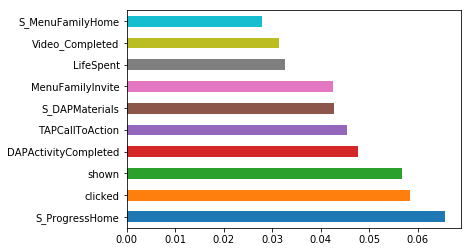

In [88]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
#plt.show()
feat_importances


In [89]:
catego= 'adjust_network'

In [91]:
h2o.init(min_mem_size = 200)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.8" 2020-07-14; OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)
  Starting server from /root/anaconda3/lib/python3.5/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpygxyq6l7
  JVM stdout: /tmp/tmpygxyq6l7/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpygxyq6l7/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ---------------------------------------------------
H2O cluster uptime:         04 secs
H2O cluster timezone:       Etc/UTC
H2O data parsing timezone:  UTC
H2O cluster version:        3.26.0.1
H2O cluster version age:    1 year, 1 month and 26 days !!!
H2O cluster name:           H2O_from_python_unknownUser_k2rbxz
H2O cluster total nodes:    1
H2O cluster free memory:    200 Gb
H2O cluster total cores:    70
H2O cluster allowed cores:  70
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.5.6 final
--------------------------  ---------------------------------------------------

In [93]:
N= raw_data[feat]
C= raw_data[catego]
Y= raw_data['y']
df= pd.concat( [N, C, Y  ], axis = 1)

In [94]:
X_hf = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [95]:
train, test = X_hf.split_frame(ratios = [.7], seed=0)

In [96]:
 X_hf.describe()

Rows:112510
Cols:52




S_NPSScore MenuFamilyInvite Video_Completed S_DAPPastPlansPremium VideoPlayerActivity clicked Dismiss_Feedback_RateActivity NPSSubmit S_CATHome_P ViewAllCollections Feedback_RateActivity PromoCodeRedeem DAPChangeActivity S_CollectionView S_PromoCode MenuMemberStats MenuHelp S_ProgressHome DAPActivityCompleted WhatchAd dismissed ArticleView S_SearchEmptyState S_FeedHome S_MenuUserProfile S_DAPNewSkills AB_TEST SignUp RestorePurchase S_CATViewSkill S_MenuFamilyProfile ActivityView OBCreateUser SkillsViewAllSkills CATSearch RateActivityDAP shown S_MilestonesHome S_SPSignup MenuFamilyDefault S_DAPMaterials S_MenuEditBaby S_MenuFamilyHome S_IA_Answer_Skill ResetSearch MilestonesUpdate InviteClassrooms LogIn LogOut S_IASetReminder adjust_network y 
 
 
 type real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real enum enum 
 mins 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
 mean 0.04350375668382746 0.16648626874013195 0.5615406843759044 0.22577561317715503 4.610172438121991 0.23045601802913818 0.05044620199620133 0.013502952191784271 0.4904707395443196 0.032962026207287644 0.279255985840022 0.060882500427086345 0.09964269983971845 0.4768869707067362 0.12457837298724907 0.20926010413984625 0.02310853712002233 1.2368528089622184 1.1397768805402568 0.046780109207926406 0.18514141951974453 0.5981169844053642 0.007491964965213206 0.4602237828642702 0.4849446151757148 0.03893114109608405 1.017077168126837 1.070108120203227 0.04830948141951669 0.06306704131027004 0.6299423975780094 3.771626605191702 1.07028459649833 0.5388211305818525 0.036759834834188 0.024868719786495234 6.577440668020707 2.0814954048374994 0.004440416595609722 0.03605742662591231 0.7101805198775396 0.2747792507220795 2.247997619126913 3.0319385295237375 0.0012911862732093071 1.49701161506676 0.011637512627110548 0.9110438602506178 0.0025248323366454245 0.10739774709848195 
 maxs 4.0 8.0 16.0 21.0 212.0 10.0 4.0 2.0 58.0 4.0 16.0 14.0 16.0 20.0 18.0 20.0 5.0 52.0 40.0 19.0 22.0 46.0 5.0 86.0 21.0 4.0 51.0 5.0 14.0 28.0 83.0 130.0 6.0 48.0 25.0 7.0 225.0 112.0 5.0 33.0 16.0 45.0 94.0 430.0 1.0 111.0 15.0 9.0 5.0 12.0 
 sigma 0.204191494544074 0.4843919169663039 1.609024966114448 0.9400495924103891 13.370857563476891 0.5828996204613913 0.2525789056954336 0.09874345396912403 2.3344162825327515 0.18963664822559972 0.8687172366954798 0.3845860203326064 0.5903130161569025 1.4729512088550865 0.6723215601625535 1.0523155241358089 0.1578695728951455 3.0482598744275275 2.376140848421322 0.2658661497197959 0.6211620330590609 1.6329249205923002 0.08803709632391316 1.3260669936518599 1.1710474951047307 0.2207362497252302 2.0599661017342292 0.28469628381990564 0.3629518886348152 0.7524350420973434 1.548748436595098 6.364494349136307 0.28278674759733397 1.663601767041557 0.5230151853673699 0.2318086458807239 12.679283716000876 5.520842782012455 0.09456734969724795 0.7942682722208694 1.2916397650631413 0.8733936923102131 4.407486320622006 11.433956565726568 0.02946337017917536 3.5190595122673143 0.30021550362464616 0.47289579194352516 0.07246577695345732 0.4085671278892994 
 zeros 104982 90336 88021 94385 79485 85428 105379 109691 94020 107409 93534 105702 104444 88861 102012 99316 108631 70223 69357 105905 91703 77047 111277 77982 78586 106548 71551 55 106600 108811 70116 38270 53 95417 109722 109348 39974 63899 112181 111743 59450 84570 46587 72957 112221 64865 111930 9677 112330 97660 
 missing 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0

In [97]:
feat= X_hf.columns[:-1]


In [99]:
nam= ['CeliaUSOsgbm','CeliaUSOsDRF','CeliaUSOsGLM','CeliaUSOsXGB']
#feat.append('timezone')

#Var= ['language', 'mp_region', 'city', 'signup_provider', 'timezone', 'user_gender',
 #              'email_domain', 'adjust_network', 'baby_gender', 'weeks_before_birth', 
  #             'baby_age_at_signup_meses', 'edad_bebe_actual_meses']

gbm = H2OGradientBoostingEstimator(model_id = nam[0], seed = 0, balance_classes=True,  nfolds = 10)
gbm.train(  x= feat, y='y', training_frame=train)

DRF = H2ORandomForestEstimator(model_id = nam[1], seed = 0, balance_classes=True, binomial_double_trees=True,  nfolds = 10)
DRF.train(  x= feat, y='y', training_frame=train)

GLM = H2OGeneralizedLinearEstimator(model_id = nam[2], seed = 0,family = 'binomial',  nfolds = 10)
GLM.train(  x= feat, y='y', training_frame=train)

XGB = H2OXGBoostEstimator(model_id = nam[3], seed = 0,  nfolds = 10)
XGB.train(  x= feat, y='y', training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
glm Model Build progress: |███████████████████████████████████████████████| 100%
xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [100]:
m= ['gbm','DRF','GLM','XGB']
nam= ['CeliaUSOsgbm','CeliaUSOsDRF','CeliaUSOsGLM','CeliaUSOsXGB']

gbmf =  gbm.model_performance(test).confusion_matrix().to_list()
ger= gbmf[1][0]/(gbmf[1][0]+gbmf[1][1])

DRFf =  DRF.model_performance(test).confusion_matrix().to_list()
DRFer= DRFf[1][0]/(DRFf[1][0]+DRFf[1][1])

GLMf =  GLM.model_performance(test).confusion_matrix().to_list()
GLMer= GLMf[1][0]/(GLMf[1][0]+GLMf[1][1])

XGBf =  XGB.model_performance(test).confusion_matrix().to_list()
XGBer= XGBf[1][0]/(XGBf[1][0]+XGBf[1][1])

er= [ger,DRFer,GLMer,XGBer]
data = {'Model':nam,
       'Error':er}

data= pd.DataFrame(data)
data

Error         Model
0  0.014298  CeliaUSOsgbm
1  0.007712  CeliaUSOsDRF
2  0.110346  CeliaUSOsGLM
3  0.004805  CeliaUSOsXGB

In [101]:
gbm.model_performance(test).confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.47746482033927545: 


Freemium    Premium    Error    Rate
--------  ----------  ---------  -------  ---------------
Freemium  16762       91         0.0054   (91.0/16853.0)
Premium   241         16615      0.0143   (241.0/16856.0)
Total     17003       16706      0.0098   (332.0/33709.0)

In [102]:
GLM.model_performance(test).confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3707082844435777: 


Freemium    Premium    Error    Rate
--------  ----------  ---------  -------  ----------------
Freemium  14867       1986       0.1178   (1986.0/16853.0)
Premium   1860        14996      0.1103   (1860.0/16856.0)
Total     16727       16982      0.1141   (3846.0/33709.0)

In [103]:
DRF.model_performance(test).confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40993236032871627: 


Freemium    Premium    Error    Rate
--------  ----------  ---------  -------  ---------------
Freemium  16816       37         0.0022   (37.0/16853.0)
Premium   130         16726      0.0077   (130.0/16856.0)
Total     16946       16763      0.005    (167.0/33709.0)

In [104]:
XGB.model_performance(test).confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42203187942504883: 


Freemium    Premium    Error    Rate
--------  ----------  ---------  -------  ---------------
Freemium  16832       21         0.0012   (21.0/16853.0)
Premium   81          16775      0.0048   (81.0/16856.0)
Total     16913       16796      0.003    (102.0/33709.0)

In [105]:
feat

['S_NPSScore',
 'MenuFamilyInvite',
 'Video_Completed',
 'S_DAPPastPlansPremium',
 'VideoPlayerActivity',
 'clicked',
 'Dismiss_Feedback_RateActivity',
 'NPSSubmit',
 'S_CATHome_P',
 'ViewAllCollections',
 'Feedback_RateActivity',
 'PromoCodeRedeem',
 'DAPChangeActivity',
 'S_CollectionView',
 'S_PromoCode',
 'MenuMemberStats',
 'MenuHelp',
 'S_ProgressHome',
 'DAPActivityCompleted',
 'WhatchAd',
 'dismissed',
 'ArticleView',
 'S_SearchEmptyState',
 'S_FeedHome',
 'S_MenuUserProfile',
 'S_DAPNewSkills',
 'AB_TEST',
 'SignUp',
 'RestorePurchase',
 'S_CATViewSkill',
 'S_MenuFamilyProfile',
 'ActivityView',
 'OBCreateUser',
 'SkillsViewAllSkills',
 'CATSearch',
 'RateActivityDAP',
 'shown',
 'S_MilestonesHome',
 'S_SPSignup',
 'MenuFamilyDefault',
 'S_DAPMaterials',
 'S_MenuEditBaby',
 'S_MenuFamilyHome',
 'S_IA_Answer_Skill',
 'ResetSearch',
 'MilestonesUpdate',
 'InviteClassrooms',
 'LogIn',
 'LogOut',
 'S_IASetReminder',
 'adjust_network']

In [106]:
n1 = list(np.arange(50, 500, 110 ))
n2 =  list(np.arange(20, 242, 120))
params = { 'ntrees': n1, 'max_depth' : n2 }
XGB = H2OXGBoostEstimator(model_id = "US", seed = 0,  nfolds = 10)
#RF = H2ORandomForestEstimator(model_id = "CeliaUSOsFTDRF", seed = 0, balance_classes=True, binomial_double_trees=True,  nfolds = 10)
#gbm = H2OGradientBoostingEstimator(model_id = "USgbm", seed = 0, balance_classes=True,  nfolds = 10)
grid = H2OGridSearch(model=XGB, hyper_params=params)
params 

{'max_depth': [20, 140], 'ntrees': [50, 160, 270, 380, 490]}

In [107]:
grid.train(x=feat, y= 'y', training_frame = train , validation_frame=test)

xgboost Grid Build progress: |████████████████████████████████████████████| 100%


In [109]:
grid_train = grid.get_grid(sort_by='recall', decreasing=True )
grid_train 

    max_depth ntrees  \
0          20    380   
1         140     50   
2          20    270   
3          20    490   
4          20    160   
5         140    490   
6          20     50   
7         140    270   
8         140    380   
9         140    160   

                                                             model_ids  \
0   Grid_XGBoost_py_3_sid_9940_model_python_1599782079367_1288_model_7   
1   Grid_XGBoost_py_3_sid_9940_model_python_1599782079367_1288_model_2   
2   Grid_XGBoost_py_3_sid_9940_model_python_1599782079367_1288_model_5   
3   Grid_XGBoost_py_3_sid_9940_model_python_1599782079367_1288_model_9   
4   Grid_XGBoost_py_3_sid_9940_model_python_1599782079367_1288_model_3   
5  Grid_XGBoost_py_3_sid_9940_model_python_1599782079367_1288_model_10   
6   Grid_XGBoost_py_3_sid_9940_model_python_1599782079367_1288_model_1   
7   Grid_XGBoost_py_3_sid_9940_model_python_1599782079367_1288_model_6   
8   Grid_XGBoost_py_3_sid_9940_model_python_1599782079367_1288_model_

In [110]:
path='/home/celia/fbfakeevents/Conversion/BehaviorMixpanel/Models/aOS/US'

g = grid_train
print(g.grid_id)
print(g)
for i, m in enumerate(g.models):
    print("Save model" + m.model_id + " to " + path + "/" + m.model_id)
    h2o.save_model(model=m, path=path, force=True)

Grid_XGBoost_py_3_sid_9940_model_python_1599782079367_1288
    max_depth ntrees  \
0          20    380   
1         140     50   
2          20    270   
3          20    490   
4          20    160   
5         140    490   
6          20     50   
7         140    270   
8         140    380   
9         140    160   

                                                             model_ids  \
0   Grid_XGBoost_py_3_sid_9940_model_python_1599782079367_1288_model_7   
1   Grid_XGBoost_py_3_sid_9940_model_python_1599782079367_1288_model_2   
2   Grid_XGBoost_py_3_sid_9940_model_python_1599782079367_1288_model_5   
3   Grid_XGBoost_py_3_sid_9940_model_python_1599782079367_1288_model_9   
4   Grid_XGBoost_py_3_sid_9940_model_python_1599782079367_1288_model_3   
5  Grid_XGBoost_py_3_sid_9940_model_python_1599782079367_1288_model_10   
6   Grid_XGBoost_py_3_sid_9940_model_python_1599782079367_1288_model_1   
7   Grid_XGBoost_py_3_sid_9940_model_python_1599782079367_1288_model_6   
8   Grid_X

In [ ]:
#import os
#os.remove("ChangedFile.csv")
#print("File Removed!")
#Para borrar entrenados que no sirven 

In [111]:
## model = grid_train.models[0]
model =  h2o.load_model(path+ '/'+ 'Grid_XGBoost_py_3_sid_9940_model_python_1599782079367_1288_model_7')
#model

In [115]:
model.model_performance(train).confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.43551158905029297: 


Freemium    Premium    Error    Rate
--------  ----------  ---------  -------  --------------
Freemium  39395       7          0.0002   (7.0/39402.0)
Premium   40          39359      0.001    (40.0/39399.0)
Total     39435       39366      0.0006   (47.0/78801.0)

In [116]:
roc = model.model_performance(test_data=test, train=train)

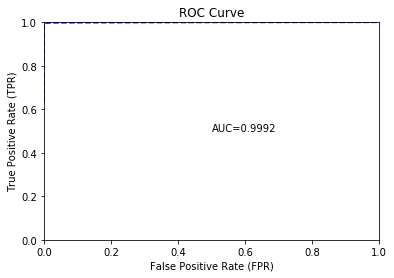

In [117]:
roc.plot()